In [1]:
# Import Dependencies
import pandas as pd
from datetime import datetime,date

In [2]:
# Read in crime CSV
crimes_data = pd.read_csv("data/crimedata_final.csv")

In [3]:
crimes_data.head()

,id,primary_type,date,description,location_description,arrest,domestic,community_area,year,lat,lng,location
0,10224738,BATTERY,2015-09-05,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,61.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,THEFT,2015-09-04,POCKET-PICKING,CTA BUS,False,False,25.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,THEFT,2018-09-01,OVER $500,RESIDENCE,False,True,44.0,2018,NaN,NaN,NaN
3,10224740,NARCOTICS,2015-09-05,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,21.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,ASSAULT,2015-09-05,SIMPLE,APARTMENT,False,True,25.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [5]:
# Set time period
start = datetime(2001, 1, 1)
end = datetime(2021, 4, 6)

In [6]:
# Create Point for Chicago
chicago = Point(41.8781, -87.6298)

In [7]:
# Get daily data for 2001-2021
weather_data = Daily(chicago, start, end)
weather_data = weather_data.fetch()

In [8]:
weather_data_clean = weather_data.drop(["tavg","wpgt","wdir","tsun","pres"],axis=1)
weather_data_clean.count()

tmin    7401
tmax    7401
prcp    7401
snow    7401
wspd    7401
dtype: int64

In [9]:
crimes_data["date"].max()

'2021-05-17'

In [10]:
weather_data_index = weather_data_clean.reset_index()

In [11]:
weather_data_index.head()

,time,tmin,tmax,prcp,snow,wspd
0,2001-01-01,-11.5,-3.5,0.0,411.5,11.9
1,2001-01-02,-14.1,-6.3,0.0,381.0,13.7
2,2001-01-03,-13.9,-2.2,0.0,375.7,19.7
3,2001-01-04,-5.5,-0.2,0.0,356.0,18.7
4,2001-01-05,-4.8,2.7,0.0,310.3,22.3


In [12]:
weather_data_index['time']= weather_data_index['time'].dt.strftime("%Y-%m-%d")
weather_data_index.head()

,time,tmin,tmax,prcp,snow,wspd
0,2001-01-01,-11.5,-3.5,0.0,411.5,11.9
1,2001-01-02,-14.1,-6.3,0.0,381.0,13.7
2,2001-01-03,-13.9,-2.2,0.0,375.7,19.7
3,2001-01-04,-5.5,-0.2,0.0,356.0,18.7
4,2001-01-05,-4.8,2.7,0.0,310.3,22.3


In [13]:
weather_data_index.dtypes

time     object
tmin    float64
tmax    float64
prcp    float64
snow    float64
wspd    float64
dtype: object

In [14]:
crimes_data_final = crimes_data.loc[crimes_data["date"] < "2021-04-07", :]

In [15]:
crimes_data_final.head()

,id,primary_type,date,description,location_description,arrest,domestic,community_area,year,lat,lng,location
0,10224738,BATTERY,2015-09-05,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,61.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,THEFT,2015-09-04,POCKET-PICKING,CTA BUS,False,False,25.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,THEFT,2018-09-01,OVER $500,RESIDENCE,False,True,44.0,2018,NaN,NaN,NaN
3,10224740,NARCOTICS,2015-09-05,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,21.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,ASSAULT,2015-09-05,SIMPLE,APARTMENT,False,True,25.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [16]:
crimes_data_final["date"].max()

'2021-04-06'

In [17]:
crimes_data_renamed = crimes_data_final.rename(columns={"date": "time"})

In [18]:
crimes_data_grouped = crimes_data_renamed.groupby("time")
crimes_data_grouped.count()

,id,primary_type,description,location_description,arrest,domestic,community_area,year,lat,lng,location
time,,,,,,,,,,,
2001-01-01,1820,1820,1820,1820,1820,1820,355,1820,1737,1737,1737
2001-01-02,1143,1143,1143,1143,1143,1143,17,1143,1139,1139,1139
2001-01-03,1151,1151,1151,1151,1151,1151,18,1151,1148,1148,1148
2001-01-04,1166,1166,1166,1166,1166,1166,5,1166,1166,1166,1166
2001-01-05,1267,1267,1267,1267,1267,1267,10,1267,1261,1261,1261
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02,493,493,493,493,493,493,493,493,487,487,487
2021-04-03,528,528,528,528,528,528,528,528,526,526,526
2021-04-04,524,524,524,522,524,524,524,524,523,523,523


In [19]:
crimes_data_grouped.dtypes

,id,primary_type,description,location_description,arrest,domestic,community_area,year,lat,lng,location
time,,,,,,,,,,,
2001-01-01,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
2001-01-02,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
2001-01-03,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
2001-01-04,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
2001-01-05,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
2021-04-03,int64,object,object,object,bool,bool,float64,int64,float64,float64,object
2021-04-04,int64,object,object,object,bool,bool,float64,int64,float64,float64,object


In [20]:
full_data = weather_data_index.merge(crimes_data_grouped["id"].count(), on="time")
full_data.head()

,time,tmin,tmax,prcp,snow,wspd,id
0,2001-01-01,-11.5,-3.5,0.0,411.5,11.9,1820
1,2001-01-02,-14.1,-6.3,0.0,381.0,13.7,1143
2,2001-01-03,-13.9,-2.2,0.0,375.7,19.7,1151
3,2001-01-04,-5.5,-0.2,0.0,356.0,18.7,1166
4,2001-01-05,-4.8,2.7,0.0,310.3,22.3,1267


In [21]:
full_data = full_data.rename(columns={"id": "number_of_crimes", "time":"date"})
full_data.head()

,date,tmin,tmax,prcp,snow,wspd,number_of_crimes
0,2001-01-01,-11.5,-3.5,0.0,411.5,11.9,1820
1,2001-01-02,-14.1,-6.3,0.0,381.0,13.7,1143
2,2001-01-03,-13.9,-2.2,0.0,375.7,19.7,1151
3,2001-01-04,-5.5,-0.2,0.0,356.0,18.7,1166
4,2001-01-05,-4.8,2.7,0.0,310.3,22.3,1267


In [22]:
full_data.to_csv("data/full_data.csv", index=False)

In [23]:
# Calculate the correlation between Tmin/ Tmax vs. number of crimes
avg_df=full_data[["tmin", "tmax"]]
full_data['tavg']= avg_df.mean(axis=1)
# new df
full_data= full_data[["tavg", "prcp", "snow", "wspd", "number_of_crimes"]]




# full_data

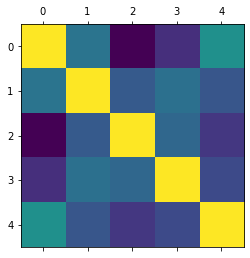

In [24]:
plt.matshow(full_data.corr())
plt.show()

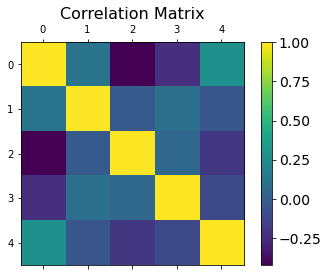

In [35]:
f = plt.figure(figsize=(6, 4))
plt.matshow(full_data.corr(), fignum=f.number)
#plt.xticks(range(full_data.select_dtypes(['number']).shape[1]), full_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(full_data.select_dtypes(['number']).shape[1]), full_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [25]:
full_data

,tavg,prcp,snow,wspd,number_of_crimes
0,-7.50,0.0,411.5,11.9,1820
1,-10.20,0.0,381.0,13.7,1143
2,-8.05,0.0,375.7,19.7,1151
3,-2.85,0.0,356.0,18.7,1166
4,-1.05,0.0,310.3,22.3,1267
...,...,...,...,...,...
7396,3.65,0.0,0.0,12.6,493
7397,13.05,0.0,0.0,22.0,528
7398,15.50,0.0,0.0,9.0,524
7399,20.20,0.0,0.0,16.7,507


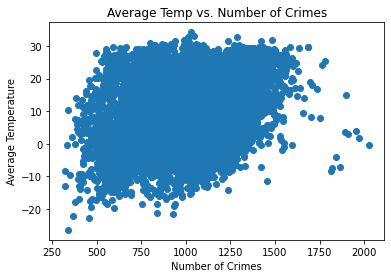

In [33]:
# Create scatter plot
x = full_data["number_of_crimes"]
y = full_data["tavg"]

plt.scatter(x, y)
plt.xlabel('Number of Crimes')
plt.ylabel('Average Temperature')
plt.title('Average Temp vs. Number of Crimes')
plt.show()